## Gradient Descent for Linear Regression

### Goals
- automate the process of optimizing $w$ and $b$ using gradient descent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem Statement
- house rent prediction
- Size(sqft), Rent Price(in 1,000s of dollars)
- predict the price for other houses- says, a house with 1,200 sqft.

In [2]:
rent_df = pd.read_csv("~/Downloads/House Rent Prediction Dataset/House_Rent_Dataset.csv")
rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
#x_train is the input variable
#y_train is the target
x_train = rent_df["Size"]
y_train = rent_df["Rent"]
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = 0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64
y_train = 0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


### Computing Cost

In [63]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression using pandas.
    
    Args:
      x (pd.Series): Data, m examples 
      y (pd.Series): target values
      w, b (scalar): model parameters  
    
    Returns:
      total_cost (float): The cost of using w, b as the parameters for linear regression
                          to fit the data points in x and y
    """
    m = len(x)  # number of data points
    predictions = w * x + b  # model predictions
    errors = predictions - y  # difference between predicted and actual
    cost = (errors ** 2).sum()  # sum of squared errors
    total_cost = (1 / (2 * m)) * cost  # final cost (MSE divided by 2)
    
    return total_cost

### Gradient descent summary
- *Gradient Descent* is an optimization algorithm used to minimize a cost function
- *gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaneously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` 
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [64]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression with pandas.
    
    Args:
      x (pd.Series): Data, m examples (input feature)
      y (pd.Series): target values
      w (scalar): model parameter (weight)
      b (scalar): model parameter (bias)
    
    Returns:
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    # Number of training examples
    m = len(x)
    
    # Initialize gradients
    dj_dw = 0
    dj_db = 0
    
    # Loop over all training examples
    for i in range(m):
        f_wb = w * x.iloc[i] + b  # prediction
        dj_dw_i = (f_wb - y.iloc[i]) * x.iloc[i]  # gradient w.r.t. w
        dj_db_i = f_wb - y.iloc[i]  # gradient w.r.t. b
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    # Average the gradients
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [65]:
# Gradient descent with tracking and clipping gradients
def gradient_descent(x, y, w, b, alpha, iterations):
    cost_history = []  # Store the cost at each iteration
    w_history = []  # Track the values of w at each iteration
    b_history = []  # Track the values of b at each iteration

    for i in range(iterations):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Gradient Clipping: Limiting the gradients
        max_gradient = 1e5  # Clip gradient to avoid overflow
        dj_dw = np.clip(dj_dw, -max_gradient, max_gradient)
        dj_db = np.clip(dj_db, -max_gradient, max_gradient)

        # Update parameters (weights and bias)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Store parameter values at each iteration
        w_history.append(w)
        b_history.append(b)

        # Compute and store the cost for this iteration
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Check if gradients or cost become NaN, and stop if necessary
        if np.isnan(cost):
            print("Cost became NaN! Stopping.")
            break

    return w, b, cost_history, w_history, b_history

### Cost versus iterations of gradient descent
- a useful measure of progress in gradient descent
- Cost should always decrease in successful runs
- The change in cost is so rapid initially

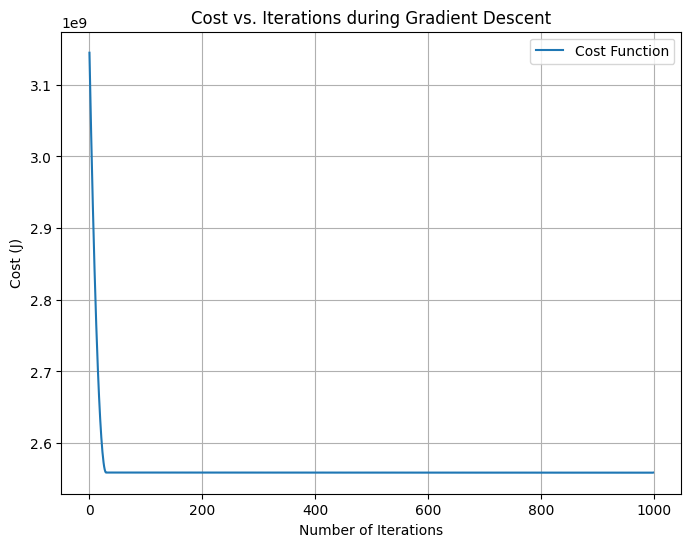

Final parameters: w = 40.0, b = -17.291422927024268


In [67]:
# Run Gradient Descent
w_final, b_final, cost_history, w_history, b_history = gradient_descent(x_train, y_train, w, b, alpha, iterations)

# Plot Cost vs. Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost vs. Iterations during Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Final parameters
print(f"Final parameters: w = {w_final}, b = {b_final}")

### Prediction
- use the optimal value for parameters $w$ and $b$

In [68]:
print(f"1000 sqft rent price prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft rent price prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft rent price prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft rent price prediction 22.7 Thousand dollars
1200 sqft rent price prediction 30.7 Thousand dollars
2000 sqft rent price prediction 62.7 Thousand dollars


### Plotting
- can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).
- Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent.


- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

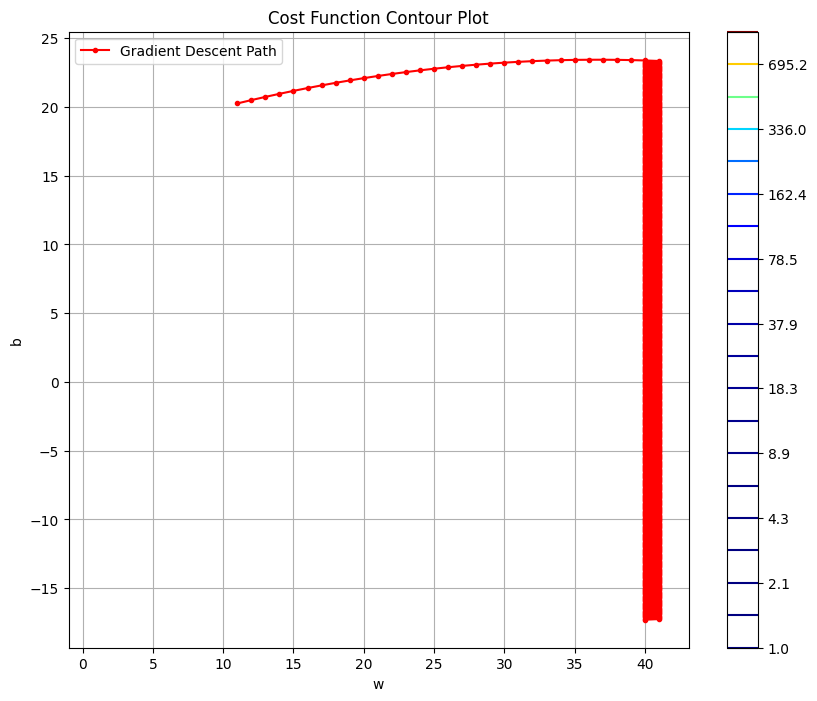

Final parameters: w = 40.0, b = -17.291422927024268


In [69]:
# Run Gradient Descent
w_final, b_final, cost_history, w_history, b_history = gradient_descent(x_train, y_train, w, b, alpha, iterations)

# Create a grid of w and b values for the contour plot
w_vals = np.linspace(-1, 1, 100)  # Range of w values
b_vals = np.linspace(-10, 10, 100)  # Range of b values
W, B = np.meshgrid(w_vals, b_vals)  # Create a grid
cost_values = np.zeros_like(W)  # Array to hold cost values

# Compute cost for each (w, b) pair on the grid
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        cost_values[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

# Plot the contour plot
plt.figure(figsize=(10, 8))
cp = plt.contour(W, B, cost_values, levels=np.logspace(0, 3, 20), cmap='jet')  # Contour levels on logarithmic scale
plt.colorbar(cp)  # Show color bar
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Function Contour Plot')

# Plot the gradient descent path
plt.plot(w_history, b_history, marker='o', markersize=3, color='r', label="Gradient Descent Path")
plt.legend()
plt.grid(True)
plt.show()

# Final parameters
print(f"Final parameters: w = {w_final}, b = {b_final}")

### Increasing Learning Rate
- The larger $a$ is, the faster gradient descent will converge to a solution.
- But if it is too large, gradient descent will diverge.

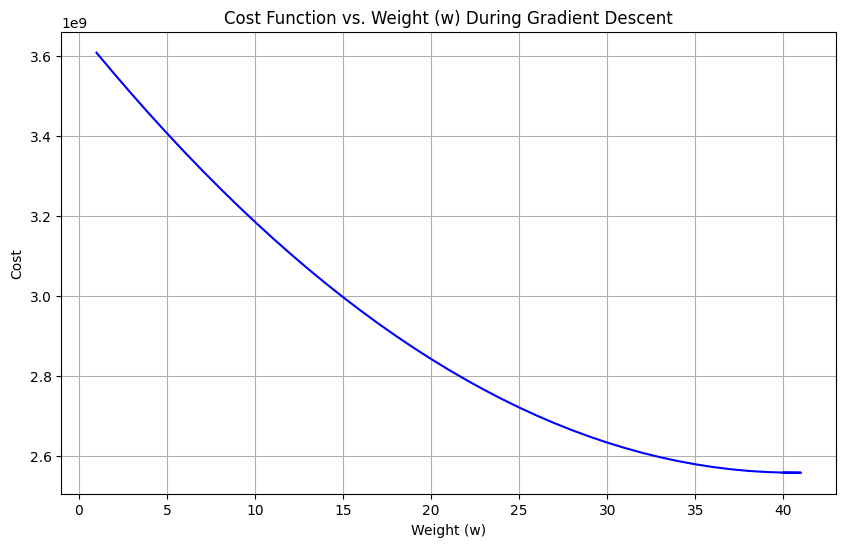

In [52]:
# Plot the cost function vs. w (weight) during gradient descent
plt.figure(figsize=(10, 6))
plt.plot(w_history, cost_history, color='b')
plt.title('Cost Function vs. Weight (w) During Gradient Descent')
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()